### import required libraries

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load the dataset

In [18]:
features_desc = {
    'CRIM': 'per capita crime rate by town',
     'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft.',
     'INDUS': 'proportion of non-retail business acres per town',
     'CHAS': 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
     'NOX': 'nitric oxides concentration (parts per 10 million)',
     'RM': 'average number of rooms per dwelling',
     'AGE': 'proportion of owner-occupied units built prior to 1940',
     'DIS': 'weighted distances to five Boston employment centres',
     'RAD': 'index of accessibility to radial highways',
     'TAX': 'full-value property-tax rate per $10,000',
     'PTRATIO': 'pupil-teacher ratio by town',
     'B': '1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
     'LSTAT': '% lower status of the population',
     'PRICE': "Median value of owner-occupied homes in $1000's"
}


In [12]:
boston = pd.read_csv('housing.csv', delimiter='\s+')

### Data analysis

In [13]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
boston.shape

(506, 14)

In [21]:
# how many nan we have in this dataset
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

* There is nor null values, good news for us!

In [22]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [23]:
# check the correlation between the columns
correlation = boston.corr()

In [25]:
# this is pearson correlation: we have both positive and negative correlations
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


* Understanding this table using colors would be much easier?

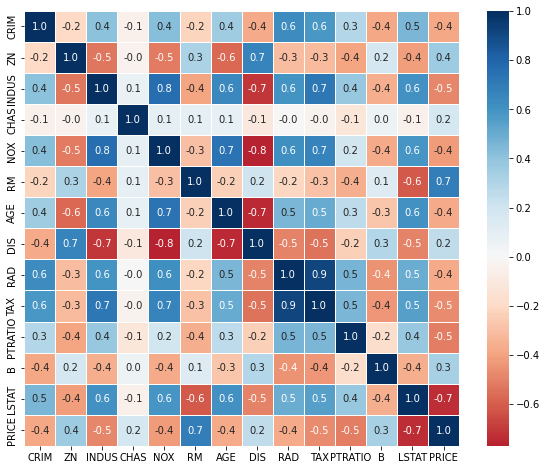

In [112]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation,
    square=True,
    annot=True,
    center=0.0,
    fmt='.1f',
    cmap='RdBu',  # divergence
    linewidths=1.0
    
);

* There is a strong negative correlation between **LSTAT** and **PRICE**

In [44]:
features_desc['LSTAT']

'% lower status of the population'

In [45]:
features_desc['ZN']

'proportion of residential land zoned for lots over 25,000 sq.ft.'

In [46]:
features_desc['RM']

'average number of rooms per dwelling'

## Train models:
1. A simple linear regression
2. Ridge
3. Lasso
4. KNNRegressor

In [54]:
# Let's train a model on the all 13 features
X = boston.drop('PRICE', axis=1)
y = boston.PRICE

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [56]:
len(X_train), len(X_test)

(379, 127)

### Train a simple linear regression (Least Sqaure)

In [173]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

linreg_y_pred = linreg.predict(X_test)

In [176]:
from sklearn import metrics

metrics.mean_squared_error(y_test, linreg_y_pred)

22.092761013684207

### Train Ridge

In [66]:
from sklearn.linear_model import Ridge

rdg = Ridge()
rdg.fit(X_train, y_train)
rdg_y_pred = rdg.predict(X_test)

metrics.mean_squared_error(y_test, rdg_y_pred)

22.02122636507958

#### Compare Ridge and LS

In [150]:
pd.DataFrame(
    {'Least Square': linreg.coef_, 'Ridge': rdg.coef_},
    index=boston.columns.drop('PRICE')
)

,Least Square,Ridge
CRIM,-0.099481,-0.094835
ZN,0.052841,0.054578
INDUS,0.043896,0.004480
CHAS,3.225522,3.011437
NOX,-19.272176,-10.336176
RM,3.356806,3.419152
AGE,0.022944,0.016305
DIS,-1.326576,-1.211315
RAD,0.326675,0.302197
TAX,-0.013360,-0.013867


### What are the five most important features from Lasso's standpoint

In [138]:
from sklearn.linear_model import Lasso

MAX_FEATURES: int = 5
rsss = []
l1_values_n_features = {}
l1_values = np.linspace(1, 20, num=25)

for l1_penalty in l1_values:
    lasso = Lasso(alpha=l1_penalty, max_iter=10**5)
    lasso.fit(X_train, y_train)
    l1_values_n_features[l1_penalty] = len(lasso.feature_names_in_[lasso.coef_.nonzero()])

In [139]:
only_max_features = [l1_penalty for l1_penalty, n_features in l1_values_n_features.items() if n_features == MAX_FEATURES]

In [142]:
# find the maximum and minimum alpha that produces a lasso with MAX_FEATURES
max_l1_penalty: float = max(only_max_features)
min_l1_penalty: float = min(only_max_features)
rsss: list[float] = []
l1_penalty_values = np.linspace(min_l1_penalty, max_l1_penalty, num=8)

for l1_penalty in l1_penalty_values:
    lasso = Lasso(alpha=l1_penalty, max_iter=10**5)
    scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')
    scores = -scores
    rsss.append(scores.mean())
best_l1_penalty = l1_penalty_values[np.argmin(rsss)]

In [143]:
print(f'Best l1_penatly that produces a model with {MAX_FEATURES} is {best_l1_penalty}')

Best l1_penatly that produces a model with 5 is 4.166666666666666


In [149]:
lasso = Lasso(alpha=best_l1_penalty)
lasso.fit(X_train, y_train)
print("Five most important features:", ", ".join(lasso.feature_names_in_[lasso.coef_.nonzero()]))

Five most important features: ZN, AGE, TAX, B, LSTAT


### Train a KNN Regressor

In [170]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, weights='distance', )
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
metrics.mean_squared_error(y_test, knn_y_pred)

/home/bahram/.virtualenvs/mlp/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


41.09188497981347

## Compare all models

In [178]:
pd.DataFrame({'Actual Price': y_test, 'LS Prediction': linreg_y_pred, 'Ridge Prediction': rdg_y_pred, 'KNN': knn_y_pred})

,Actual Price,LS Prediction,Ridge Prediction,KNN
334,20.7,21.789629,22.646528,22.557212
394,12.7,18.418331,18.655733,13.469643
404,8.5,7.375999,7.560286,16.772925
236,25.1,30.651938,30.266379,31.532391
307,28.2,32.845662,32.715010,31.997329
...,...,...,...,...
272,24.4,28.616542,28.458150,31.403981
228,46.7,33.902618,34.150133,24.532649
234,29.0,32.027539,31.660718,33.199343
351,24.1,21.279001,21.730258,30.165234
